In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
from sklearn.datasets import make_blobs
import seaborn as sns
import random
from sklearn.decomposition import PCA


In [7]:
# sample test dataset of 2D distributions (used for testing)
centers = 5
X_train, true_labels = make_blobs(n_samples=747, centers=centers, random_state=42)
X_train = StandardScaler().fit_transform(X_train)
X_train.shape

(747, 2)

In [8]:
# import the features dataset and apply StandardScaling
df = pd.read_csv('../data/banking_transactions_output_data/df_encoded.csv')
df.head()
X_train = StandardScaler().fit_transform(df)
X_train.shape

(747, 5)

In [10]:
# function to calculate euclidean distances
def euclidean(point, data):
    """
    Euclidean distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """
    return np.sqrt(np.sum((point - data)**2, axis=1))


# function to plot the clusters by color
def cluster_plot(X, labels, centroids, iteration):
    """Given:
    X: Set of parameters/features
    labels: cluster labels
    centroids: cluster centroids
    iteration: iteration number
    
    Transform X_train with PCA to select 2 highest dimensions
    
    Result:
    Plot the clusters and centroids
    """

    
    X = X[:, :2]
    
    # plot clusters by color
    sns.scatterplot(x=[X[0] for X in X],
                    y=[X[1] for X in X],
                    hue=true_labels,
                    style=labels,
                    palette="deep",
                    legend=None,
                    label='Iteration ' + str(iteration+1) 
                    )
    
    # selecting the first 2 co-ordinates from centroids
    # to match the first 2 Principal Components
    centroids = np.array(centroids)[:,:2]
    
    print("Iteration number ", iteration)
    print (centroids)
    # plot centroids
    plt.plot(centroids[:,0],
             centroids[:,1],
             'k+',
             markersize=10
         )
    plt.title ('Visualizing with PCA')
    plt.legend()
    plt.show()
    
    
    
    
    
# Main KMeans Clustering function
def KMeansFit(X_train, n_clusters=5, n_iter=1000):
    """K-clustering
    input: dataframe X_train of parameters
    n_clusters = int of the required number of clusters, default is 5
    n_iter = maximum number of iterations, default is 1000
    
    returns:
    labels: list of cluster assignments for each data point
    centroids: co-ordinates of cluster centroids
    cluster_plots: of specific K-Means iterations
    """
    
    # initialize the centroids with the kmeans++ method
    # therefore a random data point is selected as the first centroid
    # and the other centroids are chosen based on their distance from the first one 
    centroids = [random.choice(X_train)]
    for _ in range(n_clusters-1):
        # calculate the distances from all the points to centroids
        dists = np.sum([euclidean(centroid, X_train) for centroid in centroids], axis=0)
        # normalize the distances
        dists = dists/np.sum(dists)
        # choose the remaining points based on their distances
        new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
        centroids = centroids + [X_train[new_centroid_idx]]
        
        
    
    ## Loop to calculate and recalculate the centroids co-ordinates
    
    # 1. Init placeholder to test for convergence
    prev_centroids = None

    
    # 2. For loop for n_iter iterations
    for iteration in range(n_iter):
        
        # create empty set of lists to assign points per clusters (clusters)
        clusters = [[] for _ in range(n_clusters)]  # cluster of values
        clusters_index = [[] for _ in range(n_clusters)] # cluster of indexes

        # loop through X_train and assign points to nearest centroids
        for idx, x in enumerate(X_train):
            dists = euclidean(x, centroids) # distance between point and centroid
            centroid_idx = np.argmin(dists) # assign to nearest centroid
            clusters[centroid_idx].append(x) # append x to respective cluster
            clusters_index[centroid_idx].append(idx) # append index of x to cluster_index 


        # Push current centroids to previous
        prev_centroids = centroids 
        # recalculate the centroids as mean of their clustered points
        centroids = [np.mean(cluster, axis=0) for cluster in clusters] 
        
        # Catch any np.nans, resulting from a centroid having no points
        for i, centroid in enumerate(centroids):
            if np.isnan(centroid).any():  
                centroids[i] = prev_centroids[i]
        
        # check if the centroids have reached convergence i.e. are no longer changing
        if np.not_equal(centroids, prev_centroids).any() is False:
            break
            
        # plot specific iterations
        if iteration in iterations_to_visualize:
            labels = [0] * len(X_train) # list of zeros
            for cluster_number, cluster in enumerate(clusters_index):
                for index in cluster:
                    labels[index] = cluster_number
            cluster_plot(X_train, labels, centroids, iteration)
            
            
    
        

    # create the labels showing which clusters are assigned to the datapoints
    
    labels = [0] * len(X_train)
    for cluster_number, cluster in enumerate(clusters_index):
        for index in cluster:
            labels[index] = cluster_number
    
    return labels, centroids
        
    
    

Iteration number  1
[[ 0.59622488 -0.12132748]
 [ 1.22988135  1.11423865]
 [ 0.76507288 -0.78290604]
 [-2.18572709 -0.21687684]
 [-1.2033127   0.20652697]]


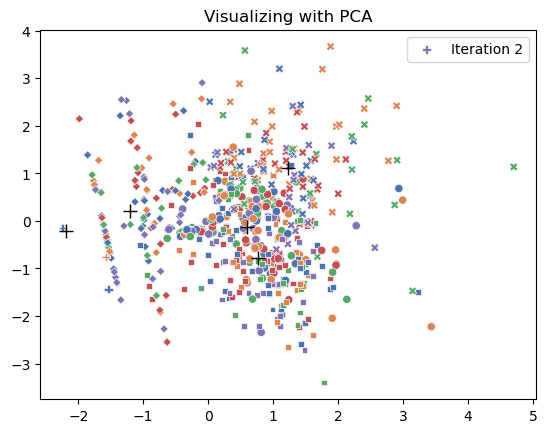

Iteration number  2
[[ 0.63425773 -0.06520101]
 [ 1.04934589  1.13196508]
 [ 0.86255769 -0.94732647]
 [-2.18572709 -0.21687684]
 [-1.21810721  0.16854219]]


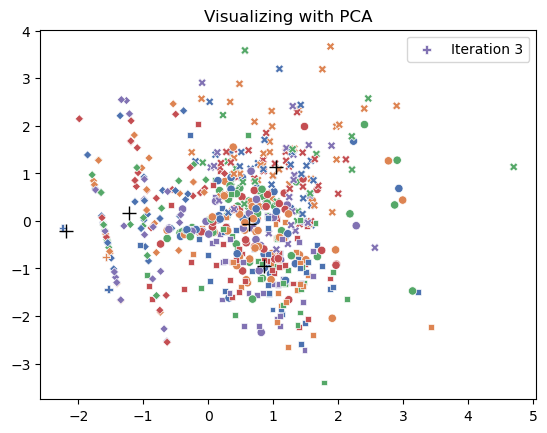

Iteration number  3
[[ 0.65277383 -0.02253885]
 [ 0.98021264  1.16067554]
 [ 0.93203225 -1.07081788]
 [-2.18572709 -0.21687684]
 [-1.23588952  0.15803335]]


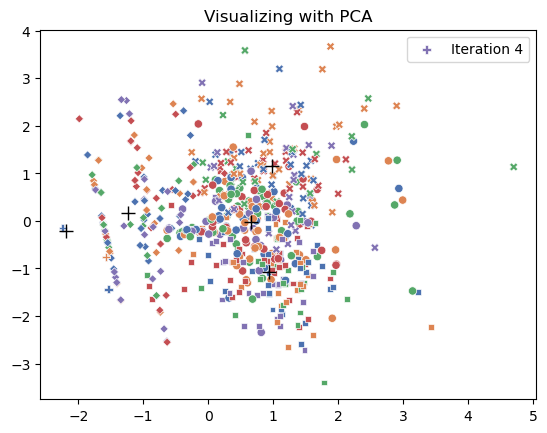

Iteration number  5
[[ 0.61395931  0.03222316]
 [ 0.96443815  1.15966682]
 [ 1.03102749 -1.15240456]
 [-2.18572709 -0.21687684]
 [-1.26065731  0.09052494]]


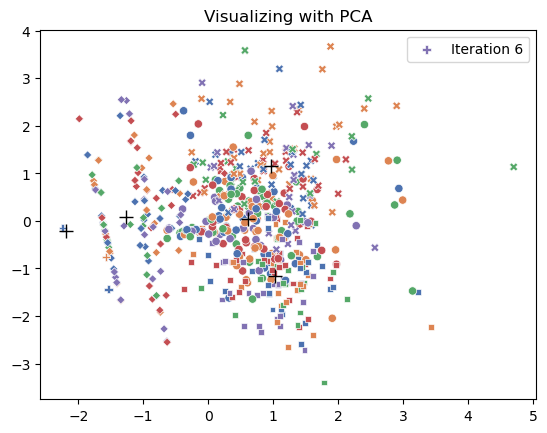

Iteration number  10
[[ 0.67396768  0.26698263]
 [ 0.94319521  1.11116208]
 [ 0.95717339 -1.1343953 ]
 [-2.18572709 -0.21687684]
 [-1.25440777  0.07781154]]


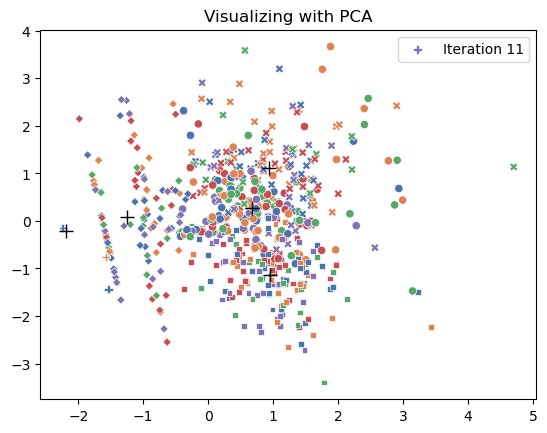

Iteration number  15
[[ 0.68557956  0.34046192]
 [ 0.92656892  1.08440972]
 [ 0.92595928 -1.04002821]
 [-2.18572709 -0.21687684]
 [-1.25847872  0.07634503]]


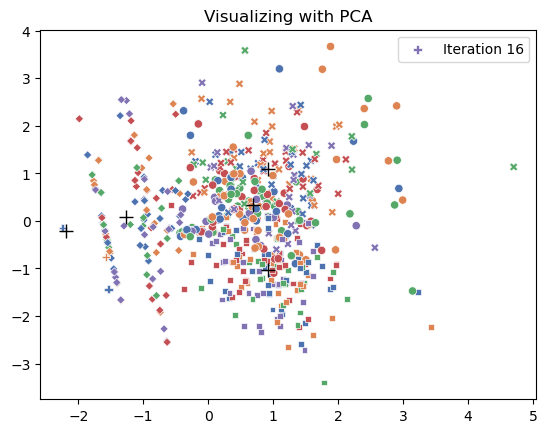

In [11]:
# select the iterations we want to visualize
iterations_to_visualize = [1, 2, 3, 5, 10, 15, 20]

# transform dataset with PCA
    
pca = PCA(n_components=None)
pca.fit(X_train)
X_pca = pca.transform(X_train) # select the 2 most significant PCA

# call the KMeans function
labels, centroids = KMeansFit(X_pca, n_clusters=5, n_iter=20)

**Observation**:
    
    Dimensionality reduction did not really help to visualize the data. But we can see that the data points are changing clusters (colors in the plots) and that the centroids are also being shifted in position, but appear to be converging across iterations.

In [12]:
np.array(centroids)

array([[ 0.6836529 ,  0.34694432,  0.49467394, -0.61665969,  0.43702795],
       [ 0.92656892,  1.08440972, -0.93833459,  0.54107795, -0.1558605 ],
       [ 0.92649286, -1.03873314,  0.30389748,  0.46645681, -0.04598087],
       [-2.18572709, -0.21687684,  0.0917953 , -0.5796838 ,  0.29849986],
       [-1.25847872,  0.07634503, -0.19157829,  0.03368188, -0.44663409]])